In [1]:
# completed
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [2]:
# completed
# Set up the direct download link
#file_url = 'https://docs.google.com/spreadsheets/d/1VPOwYgABrqhwHNE8gE8AlhrIlxvu5Lyj/export?format=xlsx'  or
file_url = 'https://docs.google.com/uc?id=1VPOwYgABrqhwHNE8gE8AlhrIlxvu5Lyj'

# Download the file
gdown.download(file_url, 'file.xlsx', quiet=False)

# Read the data into a dataframe
df1 = pd.read_excel('file.xlsx',sheet_name = 'Video ratings',skiprows=13,usecols=['Subject', 'Before', 'After', 'Difference'], index_col= 'Subject')
# df1 = pd.read_excel('video.xlsx',sheet_name = 'Video ratings',skiprows=13,usecols=['Subject', 'Before', 'After', 'Difference'], index_col= 'Subject')
df1

Downloading...
From: https://docs.google.com/uc?id=1VPOwYgABrqhwHNE8gE8AlhrIlxvu5Lyj
To: d:\NCU\2nd Year\Fourth Semester\ACS\Project\file.xlsx
100%|██████████| 246k/246k [00:00<00:00, 1.11MB/s]


,Before,After,Difference
Subject,,,
1,32,39,7
2,11,15,4
3,21,35,14
4,17,13,-4
5,30,41,11
6,38,39,1
7,14,22,8


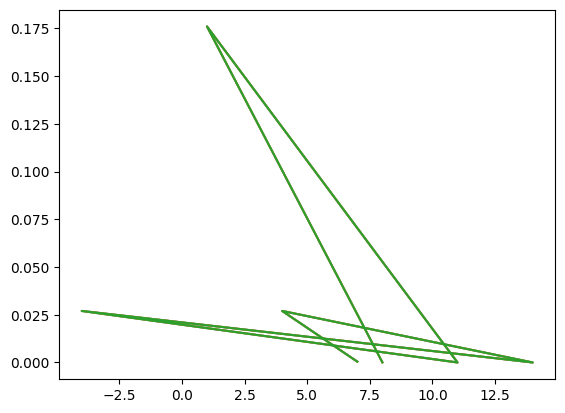

In [3]:
#TESTING

# plt.plot(df1, stats.norm.pdf(df1, 0, 1), label='μ: 0, σ: 1')
# plt.plot(df1, stats.norm.pdf(df1, 0, 1.5), label='μ:0, σ: 1.5')
plt.plot(df1["Difference"], stats.norm.pdf(df1["Difference"], 0, 2))
plt.plot(df1["Difference"], stats.norm.pdf(df1["Difference"], 0, 2))
plt.plot(df1["Difference"], stats.norm.pdf(df1["Difference"], 0, 2))
plt.show()


<Axes: xlabel='Difference', ylabel='Count'>

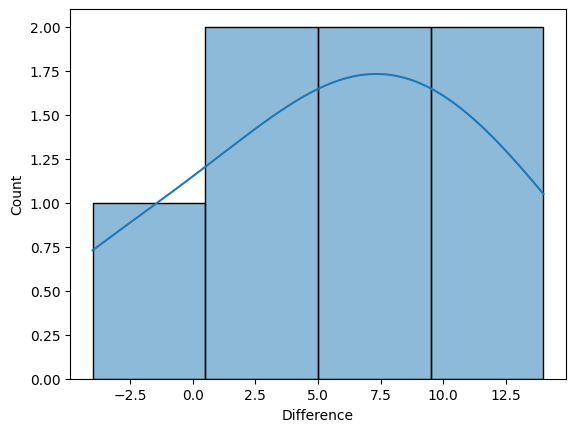

In [4]:
sns.histplot(df1["Difference"], kde = True)

<Axes: xlabel='After', ylabel='Count'>

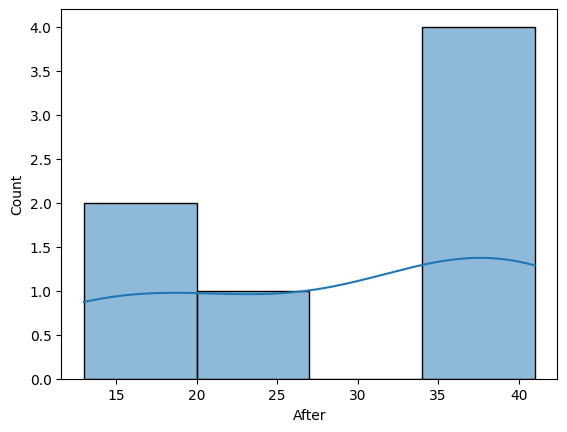

In [5]:
sns.histplot(df1["After"], kde = True)

<Axes: xlabel='Before', ylabel='Count'>

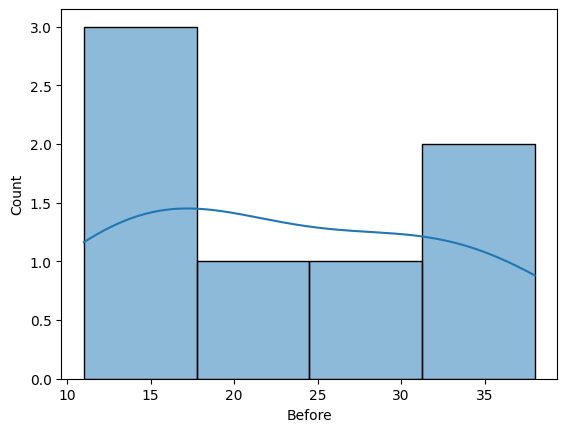

In [6]:
sns.histplot(df1["Before"], kde = True)

<Axes: ylabel='Count'>

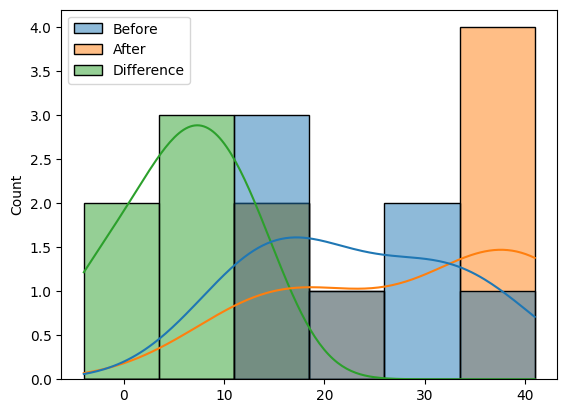

In [7]:
sns.histplot(df1, kde = True)

In [8]:
def Chebyshev_inequality(num_std_deviations):
    return 1 - 1 / num_std_deviations**2

Chebyshev_inequality(df1["Before"].std())

0.9903136531365314

In [9]:
from scipy.stats import shapiro

print(df1)
stat, p = shapiro(df1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print("\n\n\n")


print(df1["After"])
stat, p = shapiro(df1["After"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print("\n\n\n")


print(df1["Before"])
stat, p = shapiro(df1["Before"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

print("\n\n\n")

print(df1["Difference"])
stat, p = shapiro(df1["Difference"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

         Before  After  Difference
Subject                           
1            32     39           7
2            11     15           4
3            21     35          14
4            17     13          -4
5            30     41          11
6            38     39           1
7            14     22           8
Statistics=0.934, p=0.168
Sample looks Gaussian (fail to reject H0)




Subject
1    39
2    15
3    35
4    13
5    41
6    39
7    22
Name: After, dtype: int64
Statistics=0.835, p=0.089
Sample looks Gaussian (fail to reject H0)




Subject
1    32
2    11
3    21
4    17
5    30
6    38
7    14
Name: Before, dtype: int64
Statistics=0.939, p=0.627
Sample looks Gaussian (fail to reject H0)




Subject
1     7
2     4
3    14
4    -4
5    11
6     1
7     8
Name: Difference, dtype: int64
Statistics=0.984, p=0.978
Sample looks Gaussian (fail to reject H0)


In [10]:
# completed

# df2 = df1.iloc[0:7] # in all else

#df2 = df1.copy() # in my sheet only #omittted for testing 

In [11]:
# completed

# Task 1: calculate the mean and standard deviation

# df2.loc["Mean"]= np.mean(df1.iloc[0:7])  # in my sheet only
# df2.loc["Std Dev"] = np.std(df1.iloc[0:7])    # in my sheet only




# #omittted for testing 
# df2.loc["Mean"]= df1.mean()    # in my sheet only
# df2.loc["Std Dev"] = df1.std()     # in my sheet only

df2=pd.DataFrame(columns=df1.columns)
df2.loc["Mean"]= df1.mean()    # in my sheet only
df2.loc["Std Dev"] = df1.std()

# df2 = df1.iloc[0:7]
# df1.loc['Mean'] = np.mean(df2)  #in all else
# df1.loc['Standard Deviation'] = np.std(df2)       #in all else

In [12]:
print(df1,"\n\n\n\n",df2)       # in my sheet only

         Before  After  Difference
Subject                           
1            32     39           7
2            11     15           4
3            21     35          14
4            17     13          -4
5            30     41          11
6            38     39           1
7            14     22           8 



             Before      After  Difference
Mean     23.285714  29.142857    5.857143
Std Dev  10.160615  12.116498    6.094494


In [14]:
df2.iloc[7,0] #not needed, doing test     # in my sheet only

IndexError: index 7 is out of bounds for axis 0 with size 2

> Task 2: Determine the appropriate statistic to use

The appropriate statistic to use for this scenario would be a paired t-test, also known as a dependent t-test. This is because the data involves comparing ratings of the same individuals before and after a treatment (in this case, viewing a video on the company) over a period of time (one week), and the ratings are assumed to be normally distributed in the population.

A paired t-test is used when the same individuals are measured twice under different conditions, and it is ideal for situations where the data are paired or matched, such as pre-test and post-test measurements or repeated measures designs. In this case, the paired t-test would allow us to assess whether there is a statistically significant difference in the ratings of the company before and after the one-week video treatment. The alpha level of 0.05 would be used as the significance level to determine whether the observed difference in ratings is statistically significant or due to chance.

> task 3 ---------------------------------------

In [16]:
stats.norm.interval(confidence=0.95,loc=df1.mean(),scale=df1.std()/np.sqrt(7))  #closest https://www.calculator.net/confidence-interval-calculator.html?size=7&mean=23.285714&sd=10.160615&cl=95&x=77&y=10

(array([15.75876374, 20.16699475,  1.34236148]),
 array([30.81266483, 38.11871954, 10.37192423]))

In [17]:
stats.norm.interval(confidence=0.95,loc=df1.mean(),scale=stats.sem(df1))

(array([15.75876374, 20.16699475,  1.34236148]),
 array([30.81266483, 38.11871954, 10.37192423]))

In [18]:
arr1,arr2 = stats.t.interval(confidence=0.95,df=7,loc=df1.mean(),scale=df1.std()/np.sqrt(7)) #closest https://www.socscistatistics.com/confidenceinterval/default2.aspx

df2.loc["Lower"]=np.array(arr1)
df2.loc["Upper"]=np.array(arr2)
df2

,Before,After,Difference
Mean,23.285714,29.142857,5.857143
Std Dev,10.160615,12.116498,6.094494
Lower,14.204726,18.313810,0.410226
Upper,32.366702,39.971904,11.304060


In [19]:
stats.t.interval(confidence=0.95,df=7,loc=df1.mean(),scale=stats.sem(df1))   # stats.sem(df1) is equivalent to df1.std()/np.sqrt(7)

(array([14.2047261 , 18.31381025,  0.41022566]),
 array([32.36670248, 39.97190403, 11.30406005]))

In [20]:
# lower_ci, upper_ci = stats.t.interval(0.95, len(df1['Difference']), loc=df.iloc[7,2], scale=df.iloc[8,2])
# print("95% Confidence Interval for the Mean Difference: ({:.4f}, {:.4f})".format(lower_ci, upper_ci))

lower_ci, upper_ci = stats.t.interval(0.95, len(df1['Difference']), loc=df1.iloc[5,2], scale=df1.iloc[6,2])
print("95% Confidence Interval for the Mean Difference: ({:.4f}, {:.4f})".format(lower_ci, upper_ci))

95% Confidence Interval for the Mean Difference: (-17.9170, 19.9170)


In [21]:
# stats.t.interval(0.99, loc=np.mean(df1), df=len(df1), scale=stats.sem(df1)) #also including stddev and mean
stats.t.interval(alpha=0.99, loc=np.mean(df1), df=len(df1), scale=stats.sem(df1))

c:\Users\saran\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\saran\AppData\Local\Temp\ipykernel_20772\4241570878.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(alpha=0.99, loc=np.mean(df1), df=len(df1), scale=stats.sem(df1))


(array([ 9.8464685 , 13.1166032 , -2.20392467]),
 array([36.72496007, 45.16911108, 13.91821038]))

In [22]:
# stats.t.interval(alpha=0.99, loc=np.mean(df1['Before']), df=len(df1['Before'])-1, scale=stats.sem(df1['Before ']))

stats.t.interval(alpha=0.99, loc=np.mean(df1['Before']), df=len(df1['Before'])-1, scale=stats.sem(df1['Before']))

C:\Users\saran\AppData\Local\Temp\ipykernel_20772\71272310.py:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(alpha=0.99, loc=np.mean(df1['Before']), df=len(df1['Before'])-1, scale=stats.sem(df1['Before']))


(9.047887679185171, 37.523540892243396)

In [23]:
#EKDAM ORIGINAL, KOI CHANGE NHI KUCH

# Task 3: calculate the confidence intervals
n = len(df1)
t_90 = stats.t.ppf(1 - 0.1/2, df=n-1)
t_95 = stats.t.ppf(1 - 0.05/2, df=n-1)
t_99 = stats.t.ppf(1 - 0.01/2, df=n-1)

se = std_diff / np.sqrt(n)

ci_90 = mean_diff + t_90*se*np.array([-1, 1])
ci_95 = mean_diff + t_95*se*np.array([-1, 1])
ci_99 = mean_diff + t_99*se*np.array([-1, 1])

print(f"90% Confidence Interval: [{ci_90[0]:.2f}, {ci_90[1]:.2f}]")  #optional
print(f"95% Confidence Interval: [{ci_95[0]:.2f}, {ci_95[1]:.2f}]")
print(f"99% Confidence Interval: [{ci_99[0]:.2f}, {ci_99[1]:.2f}]")  #optional

NameError: name 'std_diff' is not defined

In [24]:
# Task 3: calculate the confidence intervals
n = len(df1)
t_95 = stats.t.ppf(1 - 0.05/2, df=n-1)
se = df2.iloc(7) / np.sqrt(n)
ci_95 = mean_diff + t_95*se*np.array([-1, 1])
print(f"95% Confidence Interval: [{ci_95[0]:.2f}, {ci_95[1]:.2f}]")

ValueError: No axis named 7 for object type DataFrame

In [25]:
# completed

# Task 4: test if there is enough evidence to conclude that the ratings have increased significantly

res1= stats.ttest_rel(df1["Before"], df1["After"])
print(res1)

if res1[1] < 0.05:
    print("There is enough evidence to conclude that the ratings have increased significantly.")
else:
    print("There is not enough evidence to conclude that the ratings have increased significantly.")


TtestResult(statistic=-2.542712059078773, pvalue=0.04391998543533062, df=6)
There is enough evidence to conclude that the ratings have increased significantly.


In [26]:
# somewhat completed
t_90 = stats.t.ppf(1 - 0.1/2, df=n-1)
t_99 = stats.t.ppf(1 - 0.01/2, df=n-1)

ci_90 = df2.iloc[7,0] + t_90*np.array([-1, 1])
ci_99 = df2.iloc[7,0] + t_99*np.array([-1, 1])

print(f"90% Confidence Interval: [{ci_90[0]:.2f}, {ci_90[1]:.2f}]")
print(f"99% Confidence Interval: [{ci_99[0]:.2f}, {ci_99[1]:.2f}]")

IndexError: index 7 is out of bounds for axis 0 with size 4